<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/googlenet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive


In [0]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from keras.applications import VGG19
from tqdm import tqdm

In [0]:
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

In [0]:
import cv2
import gc
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
def convert_1(arr):
  arr=np.where(arr==1,0,arr)
  arr=np.where(arr==2,1,arr)
  arr=np.where(arr==3,2,arr)
  return arr
def cng(img):
    resized = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA )
    return resized
def get_trn_tst(df,tst_fold):
  idx=np.asarray(df['fold'])
  y=convert_1(np.asarray(df['label']))
  img=np.asarray(df['image'])
  img1=[]
  for i in range(len(img)):
        img1.append(cng(img[i]))
  img1=np.asarray(img1)
  del([img])
  gc.collect()
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img1[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img1[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],299,299,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],299,299,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

In [0]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import *
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


  0%|          | 0/5 [00:00<?, ?it/s]

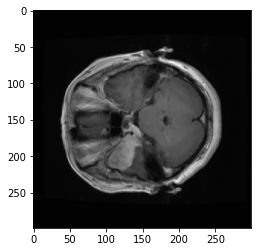

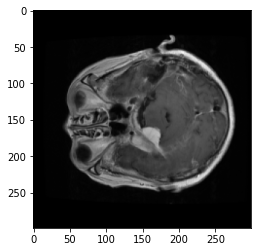

Train on 2522 samples, validate on 542 samples
Epoch 1/10
2522/2522 [==============================] - 157s 62ms/step - loss: 0.2927 - accuracy: 0.8862 - val_loss: 2.6172 - val_accuracy: 0.6679
Epoch 2/10
2522/2522 [==============================] - 132s 52ms/step - loss: 0.0708 - accuracy: 0.9770 - val_loss: 2.7231 - val_accuracy: 0.5738
Epoch 3/10
2522/2522 [==============================] - 132s 52ms/step - loss: 0.0404 - accuracy: 0.9885 - val_loss: 1.1956 - val_accuracy: 0.7288
Epoch 4/10
2522/2522 [==============================] - 132s 52ms/step - loss: 0.0501 - accuracy: 0.9826 - val_loss: 1.0303 - val_accuracy: 0.8321
Epoch 5/10
2522/2522 [==============================] - 132s 52ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.2546 - val_accuracy: 0.9077
Epoch 6/10
2522/2522 [==============================] - 132s 52ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.1770 - val_accuracy: 0.9631
Epoch 7/10
2522/2522 [==============================] - 132s 52ms/step 


 20%|██        | 1/5 [17:05<1:08:22, 1025.53s/it]

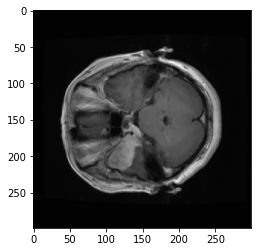

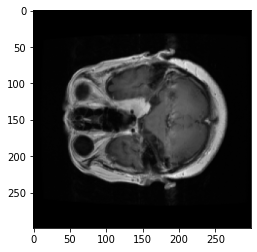

Train on 2385 samples, validate on 679 samples
Epoch 1/10
2385/2385 [==============================] - 152s 64ms/step - loss: 0.2813 - accuracy: 0.8864 - val_loss: 0.7676 - val_accuracy: 0.7555
Epoch 2/10
2385/2385 [==============================] - 127s 53ms/step - loss: 0.0811 - accuracy: 0.9715 - val_loss: 0.7901 - val_accuracy: 0.8351
Epoch 3/10
2385/2385 [==============================] - 127s 53ms/step - loss: 0.0372 - accuracy: 0.9857 - val_loss: 0.3036 - val_accuracy: 0.9308
Epoch 4/10
2385/2385 [==============================] - 127s 53ms/step - loss: 0.0427 - accuracy: 0.9857 - val_loss: 0.8151 - val_accuracy: 0.7865
Epoch 5/10
2385/2385 [==============================] - 127s 53ms/step - loss: 0.0264 - accuracy: 0.9908 - val_loss: 0.3394 - val_accuracy: 0.9102



 40%|████      | 2/5 [29:24<46:58, 939.61s/it]   

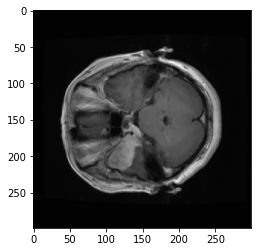

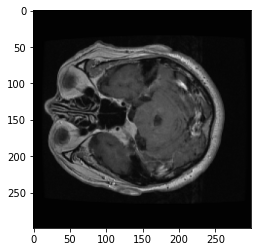

Train on 2492 samples, validate on 572 samples
Epoch 1/10
2492/2492 [==============================] - 154s 62ms/step - loss: 0.2694 - accuracy: 0.8969 - val_loss: 1.6446 - val_accuracy: 0.6958
Epoch 2/10
2492/2492 [==============================] - 130s 52ms/step - loss: 0.0753 - accuracy: 0.9739 - val_loss: 0.5364 - val_accuracy: 0.9143
Epoch 3/10
2492/2492 [==============================] - 130s 52ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.2937 - val_accuracy: 0.9143
Epoch 4/10
2492/2492 [==============================] - 130s 52ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.2315 - val_accuracy: 0.9196
Epoch 5/10
2492/2492 [==============================] - 130s 52ms/step - loss: 0.0134 - accuracy: 0.9944 - val_loss: 0.1961 - val_accuracy: 0.9545



 60%|██████    | 3/5 [41:46<29:20, 880.40s/it]

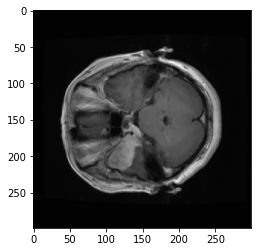

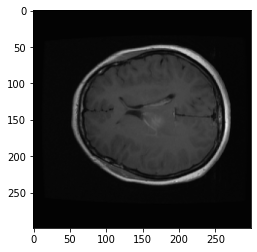

Train on 2436 samples, validate on 628 samples
Epoch 1/10
2436/2436 [==============================] - 153s 63ms/step - loss: 0.2650 - accuracy: 0.8994 - val_loss: 1.3115 - val_accuracy: 0.7054
Epoch 2/10
2436/2436 [==============================] - 129s 53ms/step - loss: 0.0804 - accuracy: 0.9688 - val_loss: 0.1770 - val_accuracy: 0.9475
Epoch 3/10
2436/2436 [==============================] - 129s 53ms/step - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.1151 - val_accuracy: 0.9682
Epoch 4/10
2436/2436 [==============================] - 129s 53ms/step - loss: 0.0452 - accuracy: 0.9885 - val_loss: 0.3045 - val_accuracy: 0.8790



 80%|████████  | 4/5 [52:02<13:21, 801.00s/it]

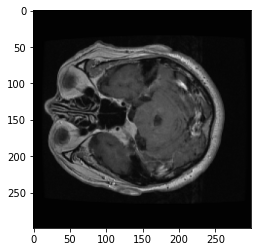

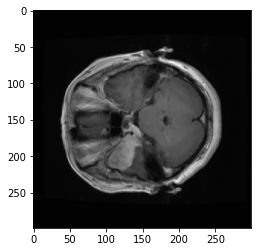

Train on 2421 samples, validate on 643 samples
Epoch 1/10
2421/2421 [==============================] - 152s 63ms/step - loss: 0.2381 - accuracy: 0.9067 - val_loss: 1.4270 - val_accuracy: 0.7138
Epoch 2/10
2421/2421 [==============================] - 129s 53ms/step - loss: 0.0806 - accuracy: 0.9715 - val_loss: 1.1036 - val_accuracy: 0.7760
Epoch 3/10
2421/2421 [==============================] - 129s 53ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.4824 - val_accuracy: 0.9207
Epoch 4/10
2421/2421 [==============================] - 129s 53ms/step - loss: 0.0264 - accuracy: 0.9922 - val_loss: 0.6352 - val_accuracy: 0.8040
Epoch 5/10
2421/2421 [==============================] - 128s 53ms/step - loss: 0.0332 - accuracy: 0.9864 - val_loss: 1.6765 - val_accuracy: 0.7963



100%|██████████| 5/5 [1:04:17<00:00, 771.51s/it]


In [24]:
from keras.callbacks import *
import gc
import keras
from keras.layers import *
from keras import backend as K
gc.collect()
K.clear_session()
class ck(Callback):
    def __init__(self):
        self.max=756
        self.lr=1
        self.count=1
        self.loss=[]
        self.lrs=[]
    def on_epoch_end(self,epoch,logs=None):
        self.loss.append(logs.get('loss'))
        self.count+=1
    def on_epoch_begin(self,epoch,logs=None):
        lr=self.lr-self.count*(1-1e-6)/756
        self.lrs.append(lr)
        K.set_value(self.model.optimizer.lr, lr)
final_result=[]
preds=[]
answers=[]
for index in tqdm(range(1,6)):
  K.clear_session()
  ep=10
  gc.collect()
  trn,tst=get_trn_tst(df,index)
  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()
  trn_x,trn_y=unison_shuffled_copies(trn[0],trn[1])
  tst_x,tst_y=unison_shuffled_copies(tst[0],tst[1])
  del([trn,tst])
  gc.collect()
  mod=InceptionV3(include_top=True, weights='imagenet')
  out_1=mod.layers[-2].output
  drp=Dropout(0.5)(out_1)
  out=Dense(3,activation='softmax')(drp)
  model=Model(inputs=mod.input,outputs=out)
  #training last layer
  cll=ck()
  esr=EarlyStopping(patience=2,min_delta=0.1,restore_best_weights=True)
  model.compile(optimizer=Adam(3e-4), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
  gc.collect()


  #adding l1 regularisation
  regularizer = keras.regularizers.l1(0.8)
  for layer in model.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)


  #training the model
  hist=model.fit(trn_x,to_categorical(trn_y),validation_data=(tst_x,to_categorical(tst_y)),batch_size=32,epochs=ep,callbacks=[esr])
  pre=model.predict(tst_x)
  preds.append(pre)
  answers.append(tst_y)
  del([trn_x,tst_x,model])
  gc.collect()
  final_result.append(accuracy_score(tst_y,np.argmax(pre,1)))
  gc.collect()

In [25]:
np.mean(final_result)

0.9242003646303625

In [0]:
cm=[]
for i in preds:
  cm.append(np.argmax(i,1))

In [0]:
from sklearn.metrics import confusion_matrix
conf=[]
for i in range(len(cm)):
  conf.append(confusion_matrix(answers[i],cm[i]))

In [28]:
conf[1]

array([[156,  11,   0],
       [ 20, 318,   0],
       [  3,  13, 158]])

In [29]:
conf[2]

array([[133,   5,   1],
       [ 14, 216,   1],
       [  1,  27, 174]])

In [30]:
conf[3]

array([[114,   8,   2],
       [  1, 323,   1],
       [ 18,   3, 158]])

In [31]:
conf[4]

array([[136,   6,  24],
       [ 12, 270,   5],
       [  3,   1, 186]])

In [33]:
conf[0]

array([[ 98,   1,  13],
       [ 13, 209,  23],
       [  0,   0, 185]])